In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('zoo.csv')
df.head()

,IME,KOSA,PERJE,JAJA,MLEKO,VAZDUH,VODA,PREDATOR,ZUBI,KICMA,DISE,OTROVNA,PERAJA,NOGE,REP,DOMACA,KLASA
0,A,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,A
1,B,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,A
2,C,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,D
3,D,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,A
4,E,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,A


In [3]:
df.describe(include='all')

,IME,KOSA,PERJE,JAJA,MLEKO,VAZDUH,VODA,PREDATOR,ZUBI,KICMA,DISE,OTROVNA,PERAJA,NOGE,REP,DOMACA,KLASA
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101
unique,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,NaN
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,NaN


In [4]:
# NOTE: ignorisemo atribut 'ime' 
feature_names = df.columns.tolist()[1:-1]
X = df[feature_names]
y = df[df.columns.tolist()[-1]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [6]:
params = {'n_neighbors' : [3, 4, 5, 6, 7],
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]
         }
grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5)

In [7]:
grid.fit(X_train, y_train)

c:\users\jovan\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [8]:
model = grid.best_estimator_

In [9]:
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))
print()
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           A       1.00      0.85      0.92        13
           B       0.86      1.00      0.92         6
           C       0.00      0.00      0.00         2
           D       0.57      1.00      0.73         4
           E       1.00      1.00      1.00         1
           F       0.67      1.00      0.80         2
           G       1.00      0.67      0.80         3

    accuracy                           0.84        31
   macro avg       0.73      0.79      0.74        31
weighted avg       0.83      0.84      0.82        31


[[11  0  0  2  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  1  0  1  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  2]]


c:\users\jovan\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jovan\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\jovan\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [10]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

In [11]:
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

In [12]:
pca_names = [f'pca_{i}' for i in range(pca.n_components_)]
df_pca = pd.DataFrame(X_pca, columns=pca_names)
df_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14
0,1.337857,-0.934337,0.315108,0.042643,0.695538,0.215595,-0.009023,-0.199751,0.177634,-0.297623,-0.145875,-0.159414,-0.338130,0.061536,0.048672
1,1.293303,-1.103371,-0.284070,0.177402,-0.275942,-0.148970,-0.335886,0.016032,-0.007277,0.154570,-0.069117,-0.017448,-0.040925,0.006839,-0.029737
2,-3.122953,0.154440,0.938280,-0.083576,-0.325782,-0.045629,-0.001818,0.114345,-0.204840,-0.258329,-0.024374,0.043583,-0.039299,-0.022383,0.012903
3,1.337857,-0.934337,0.315108,0.042643,0.695538,0.215595,-0.009023,-0.199751,0.177634,-0.297623,-0.145875,-0.159414,-0.338130,0.061536,0.048672
4,1.263758,-1.103177,0.127756,-0.443753,0.254818,-0.099647,-0.044656,0.077022,-0.136931,-0.067548,-0.047070,0.018878,0.008783,-0.010946,-0.012968


[4.39034303e+00 9.30685169e-01 5.08829493e-01 2.50929397e-01
 1.76091907e-01 1.05277328e-01 9.62906254e-02 7.91458002e-02
 6.99654787e-02 5.95119191e-02 3.82713439e-02 3.17214142e-02
 2.36488385e-02 7.97343266e-03 3.59205498e-03]

[6.48281646e-01 1.37425734e-01 7.51341796e-02 3.70524402e-02
 2.60018751e-02 1.55453364e-02 1.42183526e-02 1.16867337e-02
 1.03311599e-02 8.78757870e-03 5.65117798e-03 4.68401000e-03
 3.49200685e-03 1.17736359e-03 5.30405779e-04]


<BarContainer object of 15 artists>

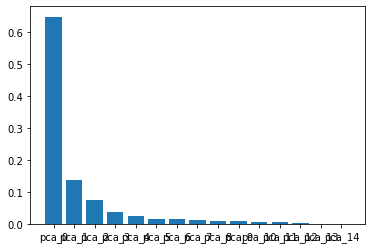

In [13]:
print(pca.explained_variance_)
print()
print(pca.explained_variance_ratio_)
plt.bar(pca_names, pca.explained_variance_ratio_)

In [14]:
# u zadatku se trazi da korsitimo prva 2 pca atributa i sa tim novim X pravimo model
X = df_pca[df_pca.columns.tolist()[:2]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [16]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid=params)
grid.fit(X_train, y_train)

c:\users\jovan\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [17]:
model = grid.best_estimator_

In [18]:
y_predicted = model.predict(X_test)
print(classification_report(y_test, y_predicted))
print()
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        13
           B       1.00      1.00      1.00         6
           C       1.00      0.50      0.67         2
           D       1.00      1.00      1.00         4
           E       0.50      1.00      0.67         1
           F       1.00      1.00      1.00         2
           G       1.00      1.00      1.00         3

    accuracy                           0.97        31
   macro avg       0.93      0.93      0.90        31
weighted avg       0.98      0.97      0.97        31


[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]


['A' 'D' 'B' 'G' 'F' 'E' 'C']


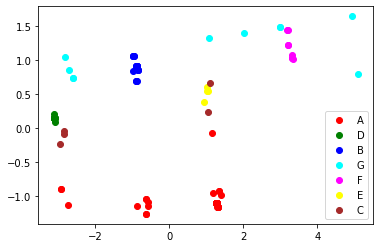

In [24]:
class_names = y.unique()
print(class_names)
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'brown']

for i, class_name in enumerate(class_names):
    class_instances = X.iloc[y[y == class_name].index]
    plt.scatter(class_instances['pca_0'], class_instances['pca_1'], color=colors[i], label=class_name)

plt.legend(loc='best')